In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import AdaBoostRegressor
import matplotlib.pyplot as plt
from sklearn.svm import SVR
import datetime
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support 

from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import numpy as np


In [123]:
df = pd.read_csv("/Users/godipally.shivakumar/Desktop/msft.csv")

In [124]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-03,243.080002,245.750000,237.399994,239.580002,238.981430,25740000
1,2023-01-04,232.279999,232.869995,225.960007,229.100006,228.527618,50623400
2,2023-01-05,227.199997,227.550003,221.759995,222.309998,221.754562,39585600
3,2023-01-06,223.000000,225.759995,219.350006,224.929993,224.368011,43613600
4,2023-01-09,226.449997,231.240005,226.410004,227.119995,226.552551,27369800


In [125]:
df['gainorloss'] = df['Adj Close'].pct_change()
df['gainorloss']

0          NaN
1    -0.043743
2    -0.029638
3     0.011785
4     0.009736
        ...   
68    0.002334
69    0.022399
70   -0.012766
71    0.009296
72   -0.001489
Name: gainorloss, Length: 73, dtype: float64

In [126]:
# up_down function for catogorizing the values  as 0 and 1 for up and down column respectively 
def up_down(row):
    if row['gainorloss'] > 0:
        row['up'] = 1
        
    elif row['gainorloss'] < 0:
        row['up'] = 0
        
    else:
        row['up'] = 'NaN'
        
    return row


df = df.apply(up_down, axis=1)

In [127]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,gainorloss,up
0,2023-01-03,243.080002,245.750000,237.399994,239.580002,238.981430,25740000,NaN,NaN
1,2023-01-04,232.279999,232.869995,225.960007,229.100006,228.527618,50623400,-0.043743,0
2,2023-01-05,227.199997,227.550003,221.759995,222.309998,221.754562,39585600,-0.029638,0
3,2023-01-06,223.000000,225.759995,219.350006,224.929993,224.368011,43613600,0.011785,1
4,2023-01-09,226.449997,231.240005,226.410004,227.119995,226.552551,27369800,0.009736,1


In [128]:
print(df.size)

657


In [129]:
df['up'] = pd.to_numeric(df['up'], errors='coerce')

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        73 non-null     object 
 1   Open        73 non-null     float64
 2   High        73 non-null     float64
 3   Low         73 non-null     float64
 4   Close       73 non-null     float64
 5   Adj Close   73 non-null     float64
 6   Volume      73 non-null     int64  
 7   gainorloss  72 non-null     float64
 8   up          72 non-null     float64
dtypes: float64(7), int64(1), object(1)
memory usage: 5.3+ KB


In [131]:
#converting date column into datetime data type
df['Date']= pd.to_datetime(df['Date'])


In [132]:
# check for null values in the entire data frame
total_nulls = df.isnull().sum().sum()

# print the results
print(f"Total null values: {total_nulls}")


Total null values: 2


In [133]:
df.dropna(inplace = True)

Text(0, 0.5, 'Adj Close')

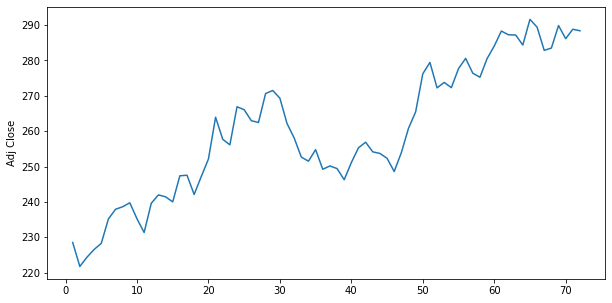

In [134]:
plt.figure(figsize=(10,5))
df['Adj Close'].plot()
plt.ylabel('Adj Close')

In [135]:
#The purpose of plotting the above closing price of a stock is to visualize the historical trend of the stock's value over time. 
#This can provide insights into the stock's performance, including its overall direction (whether it's been trending upward, downward, or staying relatively stable)
#the magnitude and frequency of its price changes, and any notable events or trends that may have affected its value.

#By analyzing the plot of closing prices over time, investors and traders can make informed decisions about:
#buying, selling, or holding the stock. They may also use technical analysis techniques 
#to identify patterns or trends in the plot that can inform their trading strategies.




# From the chart, we can see that there is an upward trend. 
#This indicates that the closing price of the stocks has been consistently increasing over the given period of time.


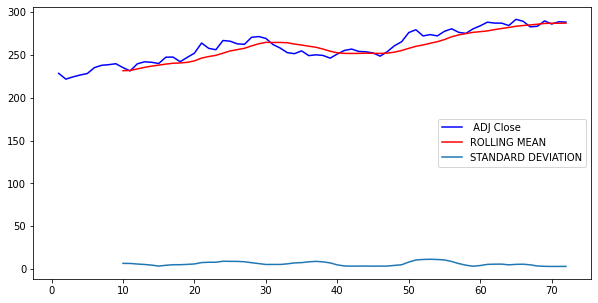

In [136]:
#Finding the moving average of the stocks price and standard deviation 

close = df['Adj Close']
ma = close.rolling(window= 10).mean()  #Window =10 i:e for the last 10 days 
std= close.rolling(window=10).std()  


#Plotting the averagre and standrad deviation 
plt.figure(figsize=(10,5))


df['Adj Close'].plot(color='b',label=' ADJ Close')
ma.plot(color='r',label='ROLLING MEAN')
std.plot(label= 'STANDARD DEVIATION')


plt.legend()

In [137]:
#The purpose of plotting the above graph is to see how the stocks are performing over a specific time period. 
#The rolling standard deviation is a measure of the volatility or variability of the data over time, and high standard deviation values indicate that the stock price is more volatile, while low values indicate that it is more stable.

#Volatility is calculated by measuring the distance between the stock prices and their standard deviation. 
#When stock prices are highly volatile, they are subject to rapid changes in response to various market and economic factors. 
#While high volatility can create opportunities for profit, it can also increase the risk of loss.

Text(0.5, 1.0, 'RETURNS')

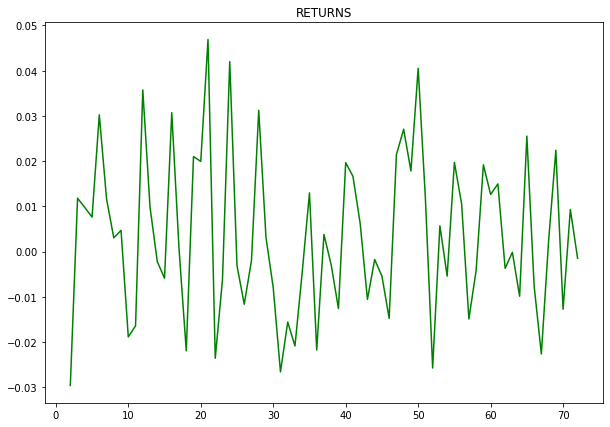

In [138]:
#PLOTTING RETURNS

returns = close/close.shift(1)-1


plt.figure(figsize=(10,7))
returns.plot(label="RETURN", color='green')
plt.title("RETURNS")

In [139]:

df_news = pd.read_csv('/Users/godipally.shivakumar/Desktop/Processed_tweets.csv')

df_news

,created_at,positive_tweets,negative_tweets,neutral_tweets,total_retweets,total_likes,total_views,total_replies,total_tweets,adjusted_score
0,2023-01-01,48,191,224,697,1761,360478.0,143,463,-0.308855
1,2023-01-02,9,10,8,232,1164,278363.0,86,27,-0.037037
2,2023-01-03,26,39,20,107,977,325810.0,76,85,-0.152941
3,2023-01-04,12,62,44,723,8163,2753033.0,320,118,-0.423729
4,2023-01-05,13,32,37,52633,152237,18672371.0,1200,82,-0.231707
...,...,...,...,...,...,...,...,...,...,...
104,2023-04-15,2,15,6,4,18,8282.0,6,23,-0.565217
105,2023-04-16,1,11,7,150,919,371581.0,8,19,-0.526316
106,2023-04-17,13,28,138,251,1827,4700403.0,163,179,-0.083799
107,2023-04-18,147,533,746,31007,253780,16597483.0,8102,1426,-0.270687


In [140]:
df_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   created_at       109 non-null    object 
 1   positive_tweets  109 non-null    int64  
 2   negative_tweets  109 non-null    int64  
 3   neutral_tweets   109 non-null    int64  
 4   total_retweets   109 non-null    int64  
 5   total_likes      109 non-null    int64  
 6   total_views      109 non-null    float64
 7   total_replies    109 non-null    int64  
 8   total_tweets     109 non-null    int64  
 9   adjusted_score   109 non-null    float64
dtypes: float64(2), int64(7), object(1)
memory usage: 8.6+ KB


In [141]:
# Convert "created_at" to datetime data type
df_news ['created_at'] = pd.to_datetime(df_news ['created_at'])

# Verify the data type conversion
print(df.dtypes)

Date          datetime64[ns]
Open                 float64
High                 float64
Low                  float64
Close                float64
Adj Close            float64
Volume                 int64
gainorloss           float64
up                   float64
dtype: object


<AxesSubplot:>

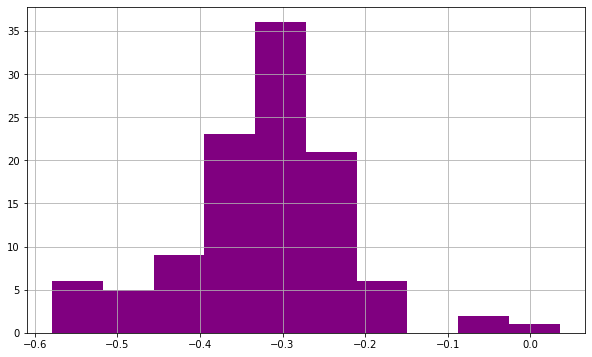

In [142]:
plt.figure(figsize = (10,6))
df_news['adjusted_score'].hist(color = 'purple')

In [143]:
#The above plot i did is too see the frequency distribution of the adjusted_score

In [144]:
df_news = df_news.rename(columns={'created_at': 'Date'})


In [145]:
df_merge = pd.merge(df, df_news, how='inner', on='Date')
df_merge

,Date,Open,High,Low,Close,Adj Close,Volume,gainorloss,up,positive_tweets,negative_tweets,neutral_tweets,total_retweets,total_likes,total_views,total_replies,total_tweets,adjusted_score
0,2023-01-04,232.279999,232.869995,225.960007,229.100006,228.527618,50623400,-0.043743,0.0,12,62,44,723,8163,2753033.0,320,118,-0.423729
1,2023-01-05,227.199997,227.550003,221.759995,222.309998,221.754562,39585600,-0.029638,0.0,13,32,37,52633,152237,18672371.0,1200,82,-0.231707
2,2023-01-06,223.000000,225.759995,219.350006,224.929993,224.368011,43613600,0.011785,1.0,59,250,228,2470,30462,2449484.0,910,537,-0.355680
3,2023-01-09,226.449997,231.240005,226.410004,227.119995,226.552551,27369800,0.009736,1.0,158,614,609,4476,27984,3092065.0,2491,1381,-0.330196
4,2023-01-10,227.759995,231.309998,227.330002,228.850006,228.278229,27033900,0.007617,1.0,11,51,31,7993,53375,19669637.0,2133,93,-0.430108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2023-04-12,284.790009,287.010010,281.959991,283.489990,283.489990,27403400,0.002334,1.0,264,823,1095,4157,28029,25753458.0,8297,2182,-0.256187
68,2023-04-13,283.589996,289.899994,283.170013,289.839996,289.839996,24222700,0.022399,1.0,352,1152,1289,2728,12495,6858156.0,1317,2793,-0.286430
69,2023-04-14,287.000000,288.480011,283.690002,286.140015,286.140015,20973900,-0.012766,0.0,12,10,34,718,4178,15791911.0,1284,56,0.035714
70,2023-04-17,289.929993,291.600006,286.160004,288.799988,288.799988,23836200,0.009296,1.0,13,28,138,251,1827,4700403.0,163,179,-0.083799


In [146]:
#X = df_merge.drop('Close', axis=1)
#y =df_merge['Close']

In [147]:
#x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
#x_train.shape

In [148]:
X = df_merge.drop(['Adj Close', 'Date','Open','High','Low','Close','Volume','gainorloss'], axis=1) # droped the column
y = df_merge['Adj Close']

# Splitting the dataset into train and test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [149]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
prediction=rf.predict(x_test)

In [150]:
print(prediction[:10])
print(y_test[:10])
print(mean_squared_error(prediction,y_test))

[242.2135304  256.48875511 265.75341713 259.62279472 259.42130771
 280.71179951 251.94907716 275.41974654 254.82943353 248.52572978]
26    262.442657
27    270.642120
48    265.440002
22    256.128448
30    262.149994
51    272.230011
7     238.632294
59    284.049988
34    254.770004
71    288.369995
Name: Adj Close, dtype: float64
240.3325262816754


In [151]:
adb = AdaBoostRegressor()
adb.fit(x_train, y_train)
predictions = adb.predict(x_test)

In [152]:


predictions = adb.predict(x_test)

print("Predictions:", predictions[:10])
print("Actual values:", y_test[:10])
print("Mean Squared Error (MSE):", mean_squared_error(predictions, y_test))
print("R-squared score:", adb.score(x_test, y_test))



Predictions: [242.4633894  264.76415638 275.347504   259.9200545  263.92304989
 276.604996   243.77769547 274.945007   259.79996478 255.671244  ]
Actual values: 26    262.442657
27    270.642120
48    265.440002
22    256.128448
30    262.149994
51    272.230011
7     238.632294
59    284.049988
34    254.770004
71    288.369995
Name: Adj Close, dtype: float64
Mean Squared Error (MSE): 179.302170480852
R-squared score: -0.12005642750294476


In [153]:
from sklearn.tree import DecisionTreeRegressor
dec_tree = DecisionTreeRegressor()
dec_tree.fit(x_train, y_train)
predictions = dec_tree.predict(x_test)

In [154]:
print(predictions[:10])
print(y_test[:10])
print(mean_squared_error(predictions,y_test))
print("Accuracy of Decision Tree model:", dec_tree.score(x_test, y_test))

[247.539993 260.790009 289.390015 286.140015 239.749512 289.390015
 256.869995 283.48999  273.779999 235.22084 ]
26    262.442657
27    270.642120
48    265.440002
22    256.128448
30    262.149994
51    272.230011
7     238.632294
59    284.049988
34    254.770004
71    288.369995
Name: Adj Close, dtype: float64
569.0067413562986
Accuracy of Decision Tree model: -2.5544447467616593


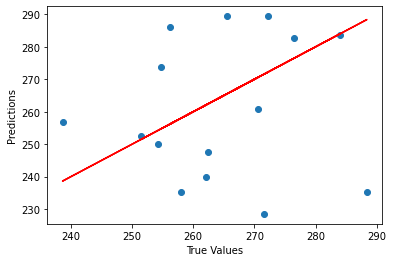

In [155]:

plt.scatter(y_test, predictions)
plt.plot(y_test, y_test, color='red')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show() 

In [156]:
#In the scatter plot, the x-axis represents the true values (actual stock prices) 
#and the y-axis represents the predicted values (predicted stock prices)
#The red line represents the regression line, which shows the expected relationship between the true and predicted values 
#if they were perfectly correlated. The scatter points that lie along this line represent the predictions that are perfectly accurate. 
#Points above the line indicate that the model overestimated the true value, while points below the line indicate that the model underestimated the true value.

In [157]:


# Create SVM regressor object
svm = SVR(kernel='rbf')

# Train the model using the training sets

svm.fit(x_train, y_train)

# Predict the prices of test data

svm_predictions = svm.predict(x_test)

# Calculate root mean squared error
svm_rmse = mean_squared_error(y_test, svm_predictions, squared=False)

print("Root Mean Squared Error (RMSE) of SVM model:", svm_rmse)



Root Mean Squared Error (RMSE) of SVM model: 15.70136370672913


In [166]:
df1 = df_merge.drop['Date','Adj Close','Open','High','Low','Close','Volume','gainorloss']



# create the feature matrix X and target variable y
X = df1.drop('up', axis=1)
y = df1['up']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create the decision tree classifier and fit it to the training data
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# make predictions on the testing data
y_pred = dtc.predict(X_test)

# calculate the accuracy score of the predictions
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


# calculate the precision, recall, and F1 score
precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")


# create the confusion matrix with labels
cm = confusion_matrix(y_test, y_pred, labels=np.unique(y))
print("Confusion Matrix:")
print("                 Predicted")
print("           Negative Positive")
print(f"Actual Negative {cm[0, 0]}       {cm[0, 1]}")
print(f"       Positive {cm[1, 0]}       {cm[1, 1]}")


TypeError: 'method' object is not subscriptable

In [169]:
#Decesion Tree


from sklearn.metrics import precision_recall_fscore_support


# create the feature matrix X and target variable y
#X = df.drop('up', axis=1)
#y = df['up']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create the decision tree classifier and fit it to the training data
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# make predictions on the testing data
y_pred = dtc.predict(X_test)

# calculate the precision, recall, and F1 score
precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")




Precision: [0.375      0.57142857]
Recall: [0.5        0.44444444]
F1 Score: [0.42857143 0.5       ]


In [170]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, accuracy_score, recall_score

# create the feature matrix X and target variable y
#X = df.drop(['up'], axis=1)
#y = df['up']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create the logistic regression classifier and fit it to the training data
lr = LogisticRegression()
lr.fit(X_train, y_train)

# make predictions on the testing data
y_pred = lr.predict(X_test)

# calculate the precision score of the predictions
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision}")

# calculate the accuracy score of the predictions
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# calculate the recall score of the predictions
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall}")


Precision: 0.2857142857142857
Accuracy: 0.2
Recall: 0.2222222222222222


In [171]:
#linear regression


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# create the feature matrix X and target variable y
#X = df.drop('up', axis=1)
#y = df['up']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create the linear regression model and fit it to the training data
lr = LinearRegression()
lr.fit(X_train, y_train)

# make predictions on the testing data
y_pred = lr.predict(X_test)

# calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# calculate the mean absolute error of the predictions
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# calculate the R-squared score of the predictions
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")


Mean Squared Error: 0.4194725537944572
Mean Absolute Error: 0.6214988283510116
R-squared: -0.7478023074769049


In [172]:
#SVM classifier



from sklearn.svm import SVC
from sklearn.metrics import precision_recall_fscore_support

# create the feature matrix X and target variable y
#X = df.drop('up', axis=1)
#y = df['up']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create the SVM classifier and fit it to the training data
svm = SVC()
svm.fit(X_train, y_train)

# make predictions on the testing data
y_pred = svm.predict(X_test)
# calculate the accuracy score of the predictions
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# calculate precision, recall, and f1-score
precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_pred)

# print the results
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1_score}")


Accuracy: 0.3333333333333333
Precision: [0.35714286 0.        ]
Recall: [0.83333333 0.        ]
F1-Score: [0.5 0. ]


# AUC GRAPHS 

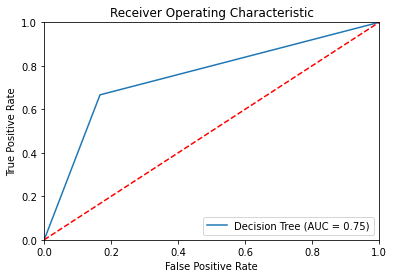

In [173]:
#AUC for decesion tree classifier 

# import necessary libraries
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# create the decision tree classifier and fit it to the training data
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# calculate the predicted probabilities for the testing data
y_pred_prob = dtc.predict_proba(X_test)[:,1]

# calculate the AUC score
auc = roc_auc_score(y_test, y_pred_prob)

# calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# plot the ROC curve
plt.plot(fpr, tpr, label='Decision Tree (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


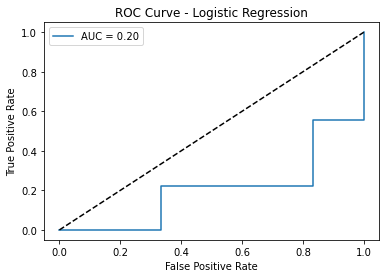

In [174]:
#AUC for logistic regression 

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# create the feature matrix X and target variable y
#X = df.drop('up', axis=1)
#y = df['up']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create the logistic regression model and fit it to the training data
lr = LogisticRegression()
lr.fit(X_train, y_train)

# make predictions on the testing data
y_pred = lr.predict(X_test)

# calculate the probability scores of the predictions
y_scores = lr.predict_proba(X_test)[:, 1]

# calculate the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
auc = roc_auc_score(y_test, y_scores)

# plot the ROC curve
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.show()






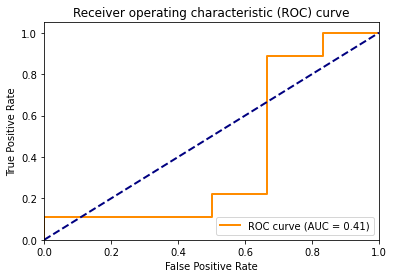

In [175]:
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# create the feature matrix X and target variable y
#X = df.drop('up', axis=1)
#y = df['up']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create the SVM classifier and fit it to the training data
svm = SVC(probability=True)
svm.fit(X_train, y_train)

# predict probabilities of positive class for the testing data
y_prob = svm.predict_proba(X_test)[:,1]

# calculate the false positive rate (fpr), true positive rate (tpr), and threshold values for different probability thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()


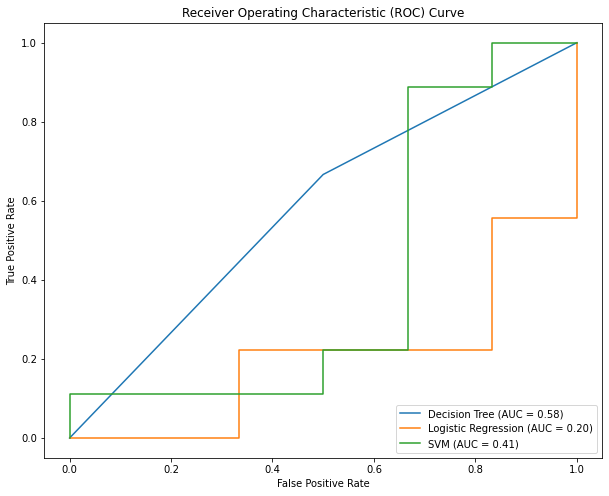

In [176]:
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt



# create the feature matrix X and target variable y
#X = df.drop('up', axis=1)
#y = df['up']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create the classifiers
classifiers = [
    DecisionTreeClassifier(),
    LogisticRegression(),
    SVC(probability=True)
]

# create a list of labels for the classifiers
labels = [
    'Decision Tree',
    'Logistic Regression',
    'SVM'
]

# iterate over the classifiers and plot the ROC curve
fig, ax = plt.subplots(figsize=(10,8))

for clf, label in zip(classifiers, labels):
    clf.fit(X_train, y_train)
    y_pred_prob = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    ax.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

# add the legend, title, and axis labels
ax.legend(loc='lower right')
ax.set_title('Receiver Operating Characteristic (ROC) Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.show()


In [167]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix

# Assuming df_merge is a pandas DataFrame

# Drop the specified columns from df_merge
columns_to_drop = ['Date', 'Adj Close', 'Open', 'High', 'Low', 'Close', 'Volume', 'gainorloss']
df1 = df_merge.drop(columns_to_drop, axis=1)

# create the feature matrix X and target variable y
X = df1.drop('up', axis=1)
y = df1['up']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create the decision tree classifier and fit it to the training data
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# make predictions on the testing data
y_pred = dtc.predict(X_test)

# calculate the accuracy score of the predictions
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# calculate the precision, recall, and F1 score
precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")

# create the confusion matrix with labels
cm = confusion_matrix(y_test, y_pred, labels=np.unique(y))
print("Confusion Matrix:")
print("                 Predicted")
print("           Negative Positive")
print(f"Actual Negative {cm[0, 0]}       {cm[0, 1]}")
print(f"       Positive {cm[1, 0]}       {cm[1, 1]}")


Accuracy: 0.7333333333333333
Precision: [0.625      0.85714286]
Recall: [0.83333333 0.66666667]
F1 Score: [0.71428571 0.75      ]
Confusion Matrix:
                 Predicted
           Negative Positive
Actual Negative 5       1
       Positive 3       6
